# 1️⃣ Data preparation and normalization

#### Loading the dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/data_10_3.csv')
# Display the first few rows of the dataset

data.head()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
0,5.679,6.330,6.506,7.109,5.739,6.544,6.500,7.280,1088.608,1098.204
1,5.586,6.331,6.423,7.083,5.636,6.354,6.439,7.089,1088.608,1098.204
2,5.691,6.483,6.393,7.263,5.530,6.432,6.364,7.197,1088.608,1098.204
3,5.714,6.539,6.539,7.209,5.633,6.562,6.494,7.251,1088.608,1098.204
4,5.720,6.321,6.452,7.082,5.738,6.419,6.485,7.148,1088.608,1098.204


#### Processing the initial data
- Extracting a subset of 50,000 rows.
- Corrupting 10% of the subset rows by introducing at least one empty cell.

In [3]:
import numpy as np

# Extract a subset of 50,000 rows
subset = data.iloc[:50000].copy()

# Calculate the number of rows to corrupt
num_rows_to_corrupt = int(0.10 * len(subset))

# Randomly select rows to corrupt
rows_to_corrupt = np.random.choice(subset.index, size=num_rows_to_corrupt, replace=False)

# For each selected row, randomly select a column to set as NaN
for row in rows_to_corrupt:
    col_to_corrupt = np.random.choice(subset.columns)
    subset.at[row, col_to_corrupt] = np.nan

# Check the first few rows of the corrupted subset
subset.head()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
0,5.679,6.330,6.506,7.109,5.739,6.544,6.500,7.280,1088.608,1098.204
1,5.586,6.331,6.423,7.083,5.636,6.354,6.439,7.089,1088.608,1098.204
2,5.691,6.483,6.393,7.263,5.530,6.432,6.364,7.197,1088.608,1098.204
3,5.714,6.539,6.539,7.209,5.633,6.562,6.494,7.251,1088.608,1098.204
4,5.720,6.321,6.452,7.082,5.738,6.419,6.485,7.148,1088.608,1098.204


#### Save the corrupted subset

In [14]:
# Save the corrupted subset to a CSV file
file_path = "data/data_10_3_corrupted.csv"
subset.to_csv(file_path, index=False)
file_path

'data/data_10_3_corrupted.csv'

## Visualization of significant features

#### a. Visualization of Significant Features

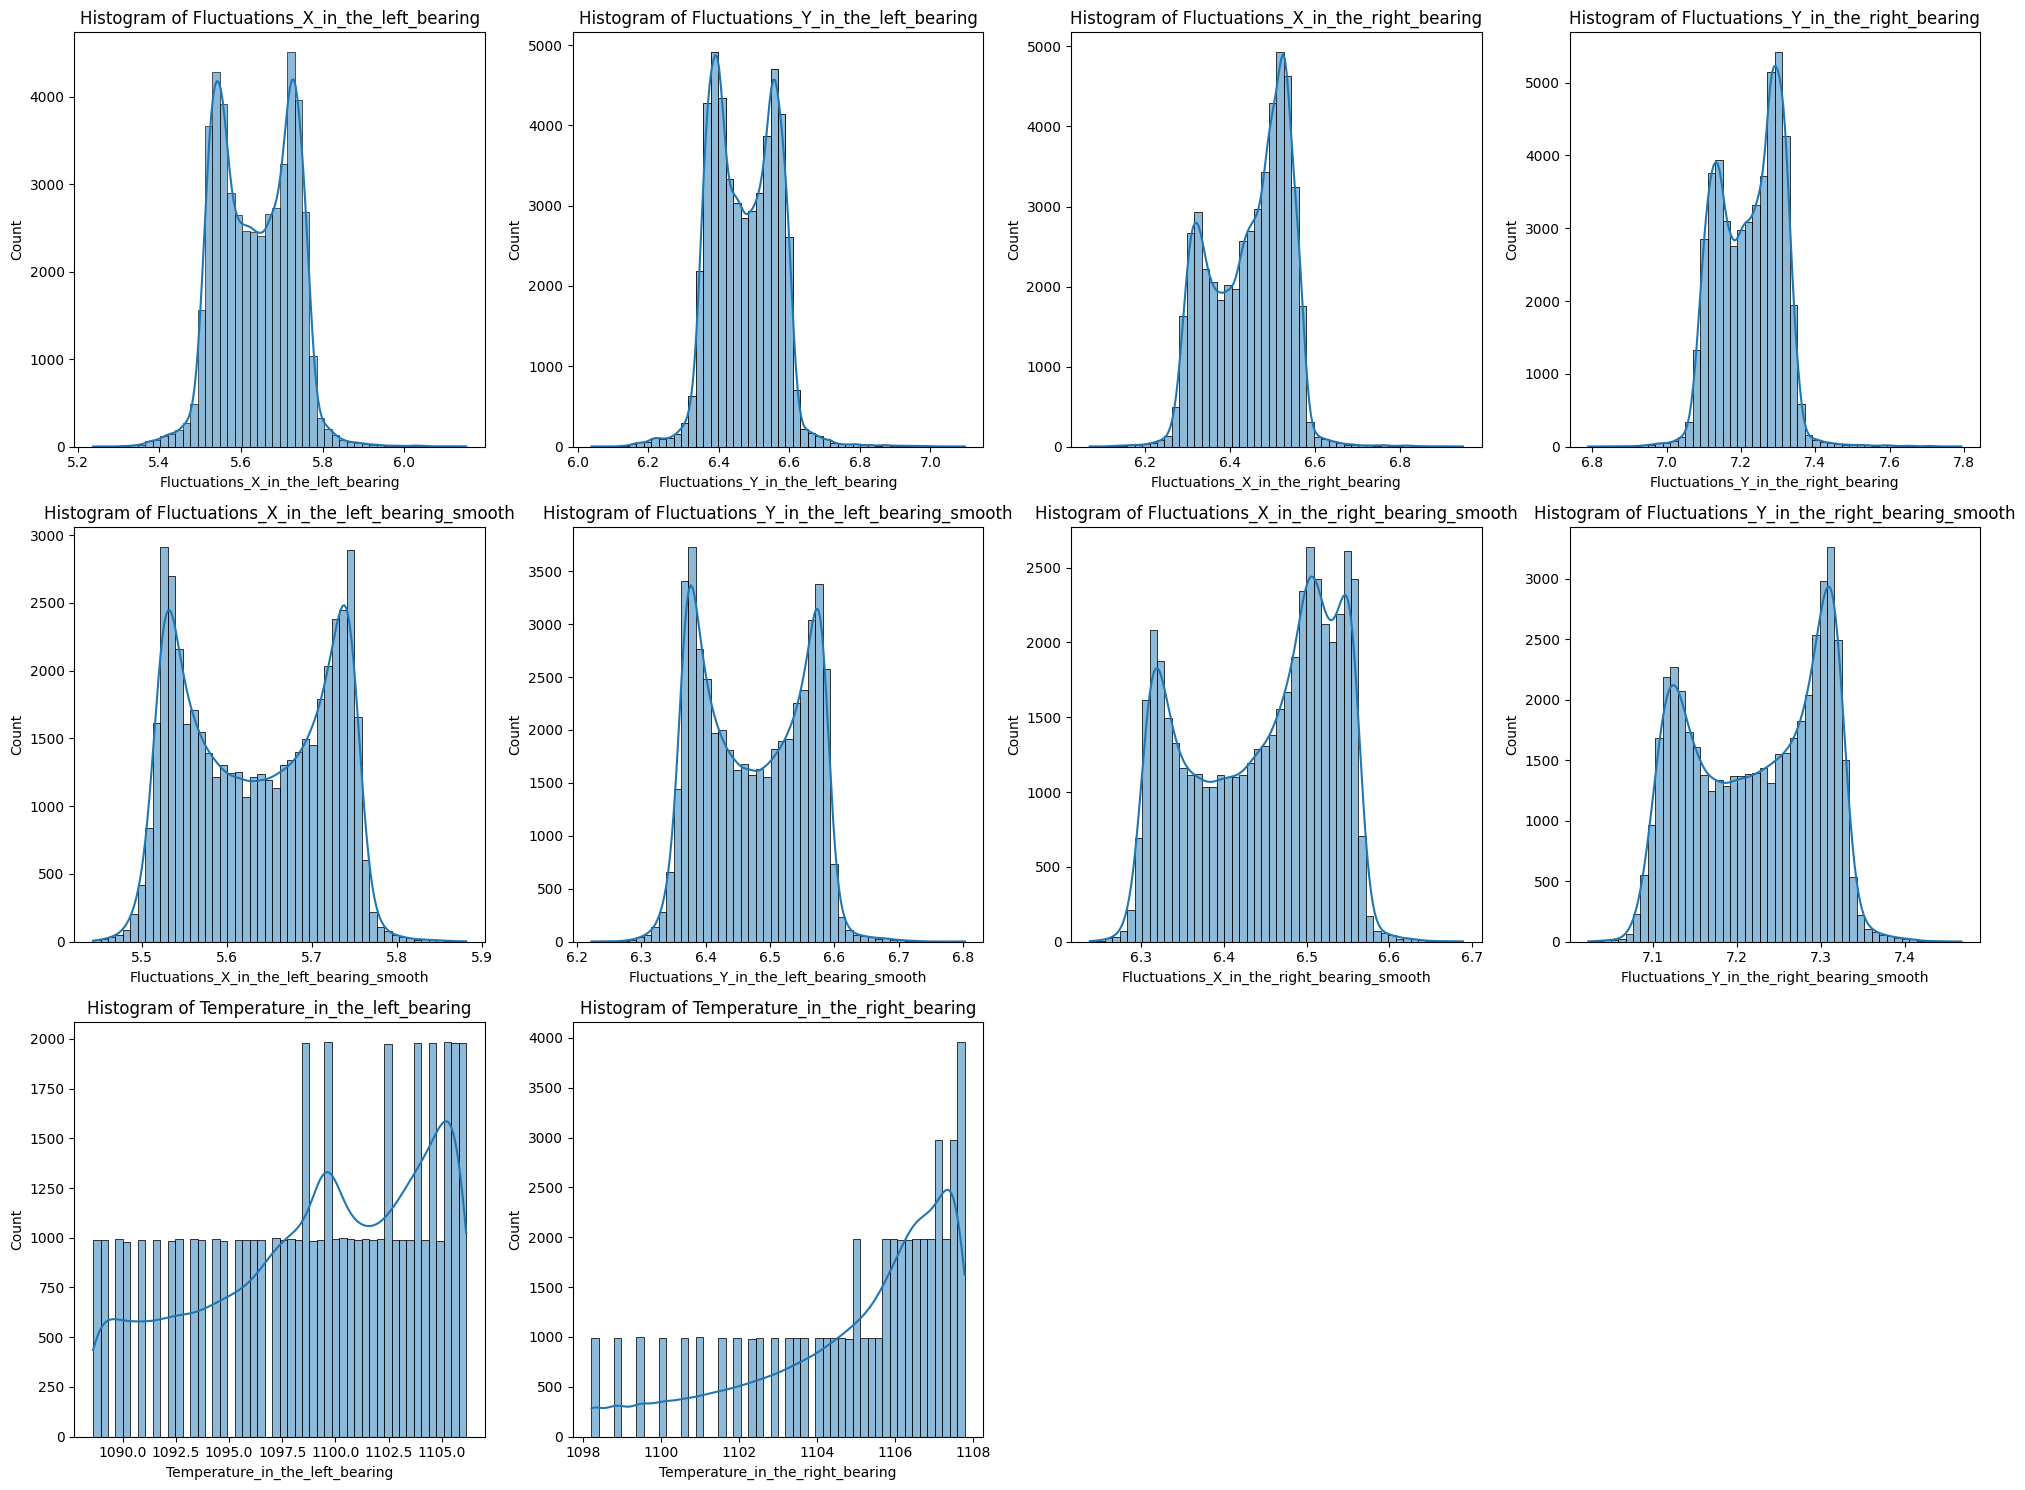

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(20, 15))

# Make subplots for each feature
for index, column in enumerate(subset.columns, start=1):
    plt.subplot(3, 4, index)
    sns.histplot(subset[column], kde=True, bins=50)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()

plt.show()

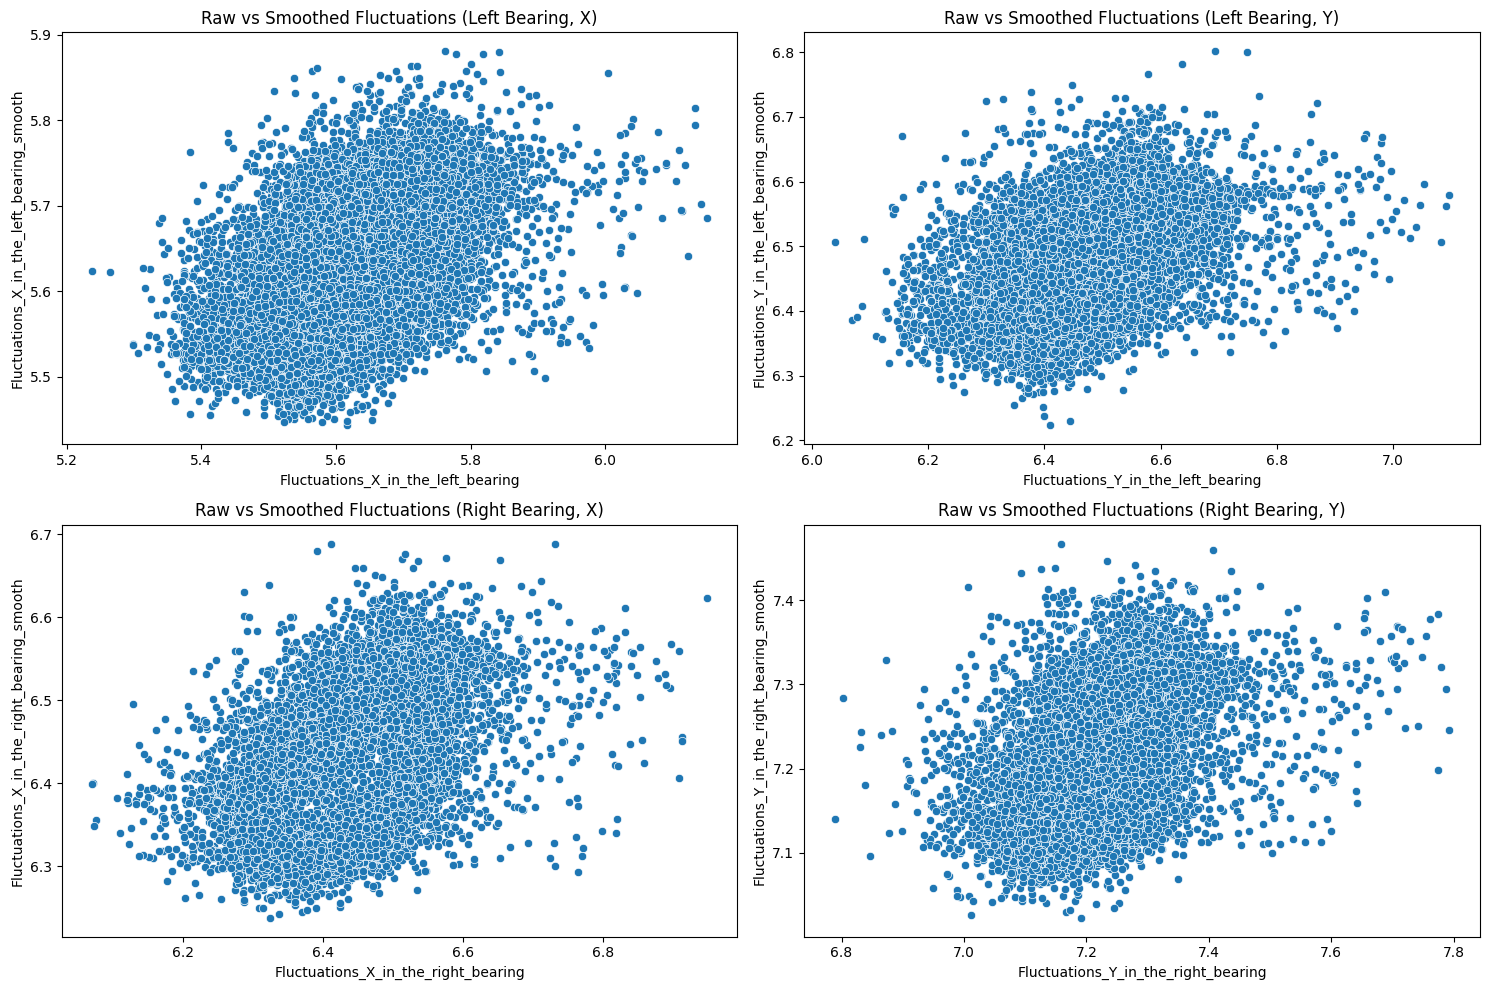

In [16]:
# Set up the figure size
plt.figure(figsize=(15, 10))

# Scatter plot for raw vs smoothed fluctuations for left bearing in X direction
plt.subplot(2, 2, 1)
sns.scatterplot(x='Fluctuations_X_in_the_left_bearing', y='Fluctuations_X_in_the_left_bearing_smooth', data=subset)
plt.title('Raw vs Smoothed Fluctuations (Left Bearing, X)')

# Scatter plot for raw vs smoothed fluctuations for left bearing in Y direction
plt.subplot(2, 2, 2)
sns.scatterplot(x='Fluctuations_Y_in_the_left_bearing', y='Fluctuations_Y_in_the_left_bearing_smooth', data=subset)
plt.title('Raw vs Smoothed Fluctuations (Left Bearing, Y)')

# Scatter plot for raw vs smoothed fluctuations for right bearing in X direction
plt.subplot(2, 2, 3)
sns.scatterplot(x='Fluctuations_X_in_the_right_bearing', y='Fluctuations_X_in_the_right_bearing_smooth', data=subset)
plt.title('Raw vs Smoothed Fluctuations (Right Bearing, X)')

# Scatter plot for raw vs smoothed fluctuations for right bearing in Y direction
plt.subplot(2, 2, 4)
sns.scatterplot(x='Fluctuations_Y_in_the_right_bearing', y='Fluctuations_Y_in_the_right_bearing_smooth', data=subset)
plt.title('Raw vs Smoothed Fluctuations (Right Bearing, Y)')

plt.tight_layout()
plt.show()

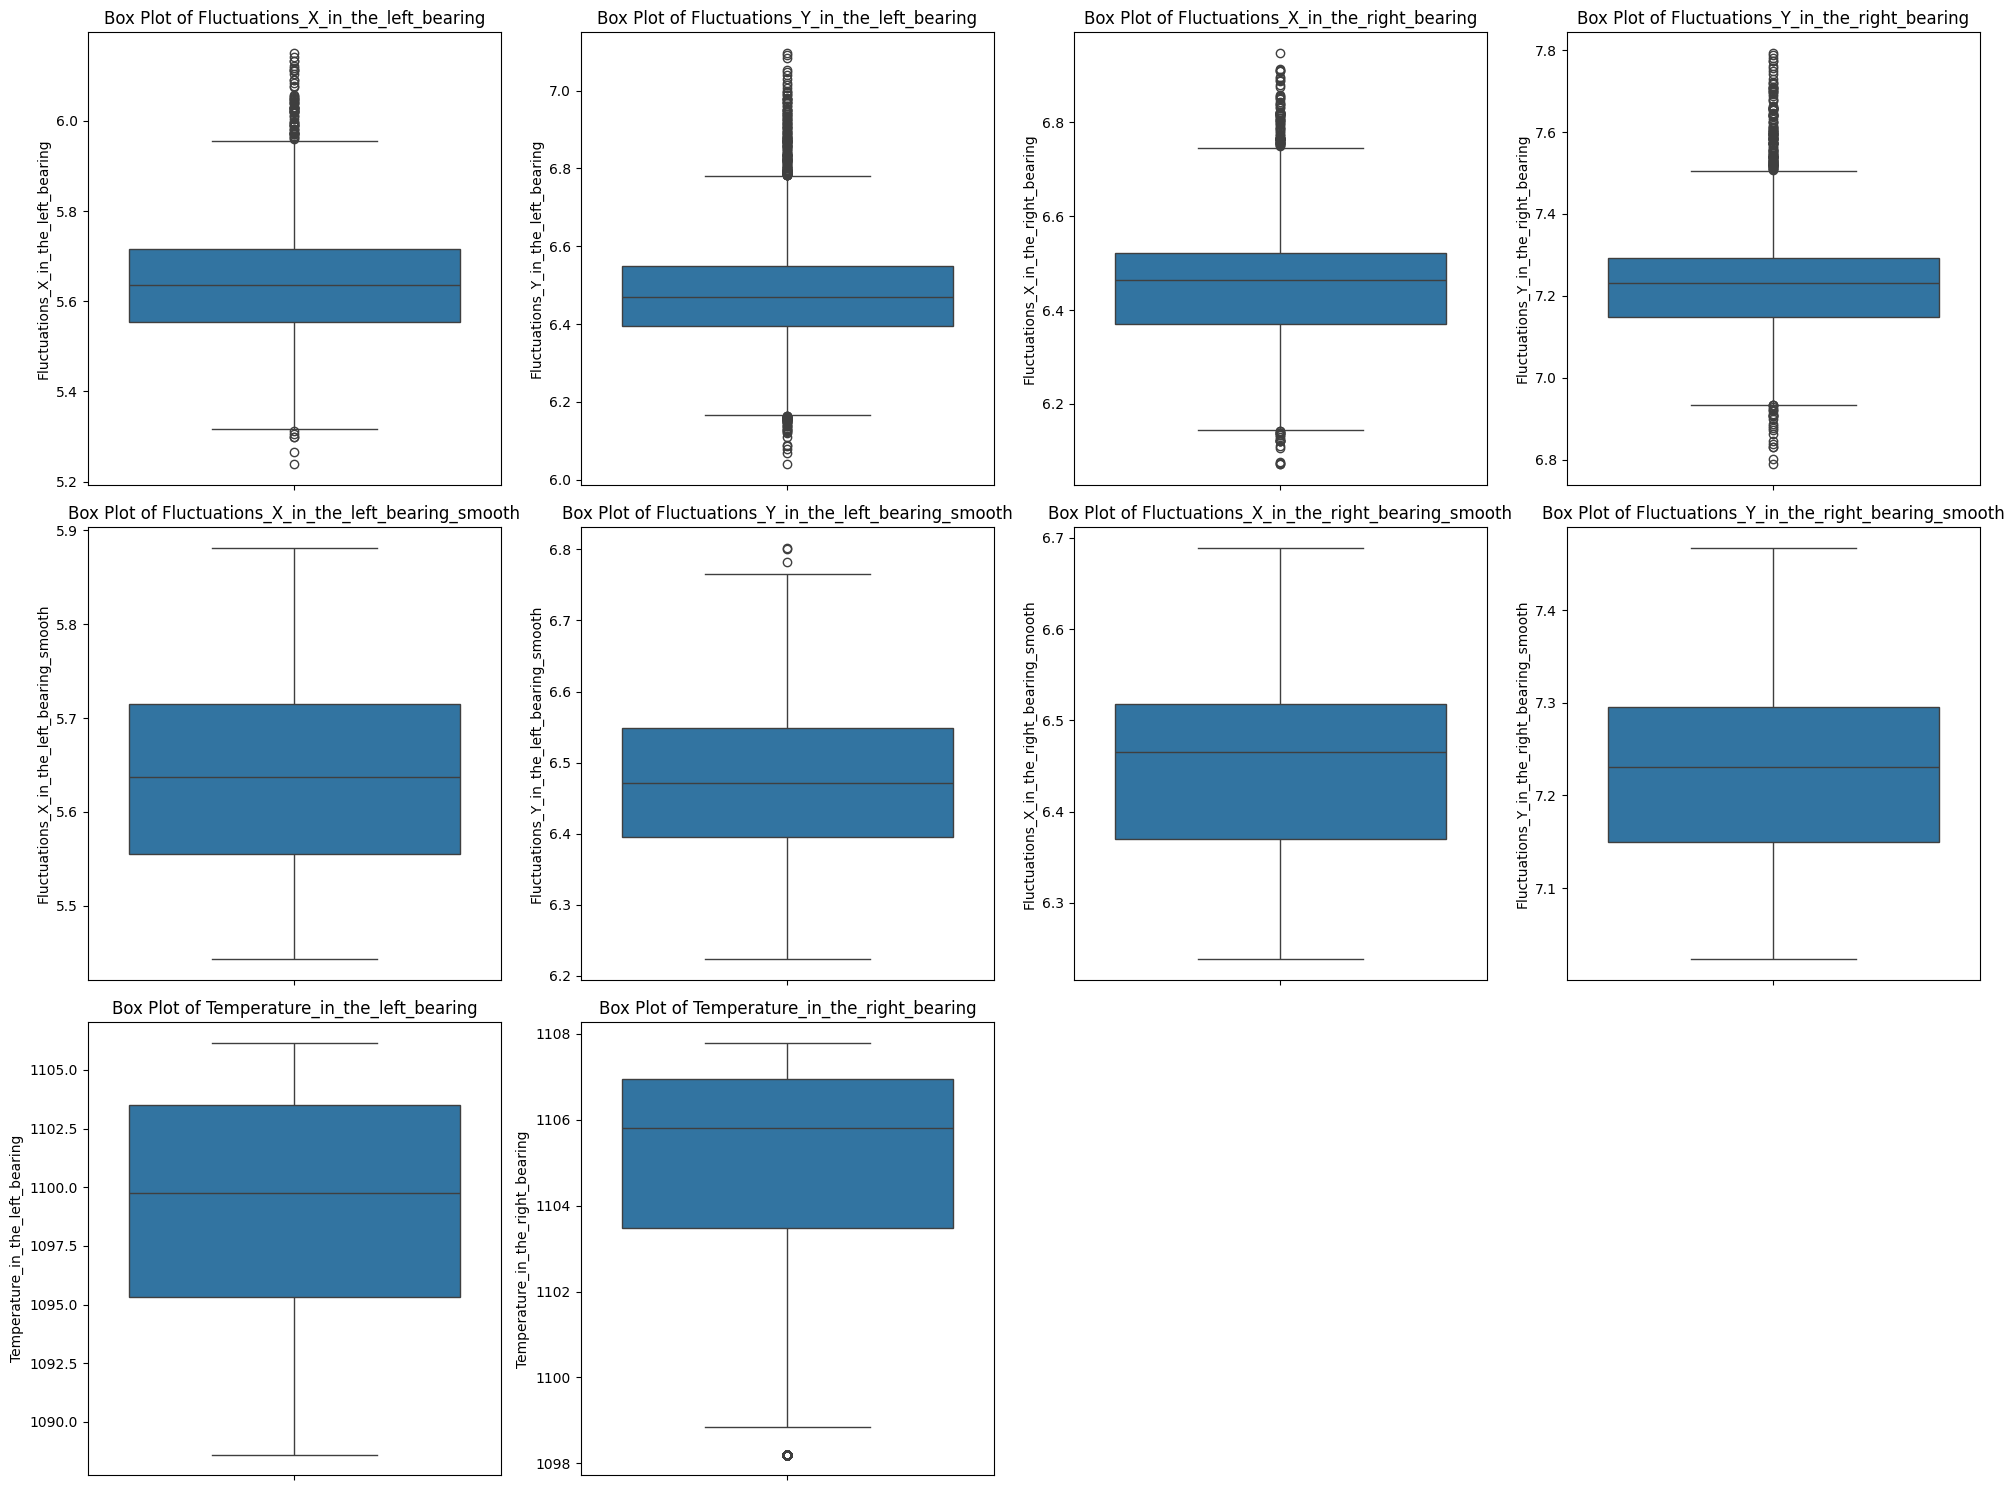

In [17]:
# Set up the figure size
plt.figure(figsize=(20, 15))

# Create box plots for each feature
for index, column in enumerate(subset.columns, start=1):
    plt.subplot(3, 4, index)
    sns.boxplot(y=subset[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()

## Data cleaning
- Removing missing values
- Normalizing the data
- Removing duplicates

In [22]:
######################################################################
# 1. Remove missing values
######################################################################
subset_cleaned = subset.dropna()

######################################################################
# 2. Normalize the data using Min-Max Scaling
######################################################################
min_values = subset_cleaned.min()
max_values = subset_cleaned.max()
subset_normalized = (subset_cleaned - min_values) / (max_values - min_values)
# Save subset to a CSV file
file_path = "data/data_10_3_normalized.csv"
subset_normalized.to_csv(file_path, index=False)
file_path

######################################################################
# 3. Remove duplicates
######################################################################
subset_no_duplicates = subset_normalized.drop_duplicates()
# Save subset to a CSV file
file_path = "data/data_10_3_no_duplicates.csv"
subset_no_duplicates.to_csv(file_path, index=False)
file_path

# Check the shape of the cleaned dataset
subset_no_duplicates.shape

(45000, 10)

#### Generating the correlation matrix for the cleaned dataset

In [23]:
# Calculate the correlation matrix
correlation_matrix = subset_no_duplicates.corr()
correlation_matrix

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
Fluctuations_X_in_the_left_bearing,1.000000,0.050368,0.770217,0.174768,0.655960,0.616110,0.611105,0.682843,-0.001488,-0.001465
Fluctuations_Y_in_the_left_bearing,0.050368,1.000000,0.060978,0.722009,-0.490436,0.624466,-0.481616,0.529986,-0.000965,-0.001254
Fluctuations_X_in_the_right_bearing,0.770217,0.060978,1.000000,0.120627,0.652506,0.604222,0.620229,0.705607,0.005501,0.004014
Fluctuations_Y_in_the_right_bearing,0.174768,0.722009,0.120627,1.000000,-0.409337,0.685893,-0.427099,0.634812,0.009862,0.007976
Fluctuations_X_in_the_left_bearing_smooth,0.655960,-0.490436,0.652506,-0.409337,1.000000,0.082496,0.908604,0.208864,-0.001378,-0.001176
Fluctuations_Y_in_the_left_bearing_smooth,0.616110,0.624466,0.604222,0.685893,0.082496,1.000000,0.072717,0.907107,0.000249,-0.000133
Fluctuations_X_in_the_right_bearing_smooth,0.611105,-0.481616,0.620229,-0.427099,0.908604,0.072717,1.000000,0.142518,0.004196,0.002957
Fluctuations_Y_in_the_right_bearing_smooth,0.682843,0.529986,0.705607,0.634812,0.208864,0.907107,0.142518,1.000000,0.011320,0.008920
Temperature_in_the_left_bearing,-0.001488,-0.000965,0.005501,0.009862,-0.001378,0.000249,0.004196,0.011320,1.000000,0.981365
Temperature_in_the_right_bearing,-0.001465,-0.001254,0.004014,0.007976,-0.001176,-0.000133,0.002957,0.008920,0.981365,1.000000


# 2️⃣ Classification

In [24]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = subset_no_duplicates.drop('Temperature_in_the_left_bearing', axis=1)
y = subset_no_duplicates['Temperature_in_the_left_bearing']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

ModuleNotFoundError: No module named 'sklearn'